<a href="https://colab.research.google.com/github/JamshedAl/codsoft_-2/blob/main/creditcardfraud(logistic_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/fraudTrain.csv")
data_t = pd.read_csv("/content/fraudTest.csv")

In [ ]:
data_t.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:


data.shape

(1296675, 23)

In [ ]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
data = data.drop("trans_num",1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
data.cc_num.value_counts()

571365235126           3123
4512828414983801773    3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
180097223252063           7
4225628813173670          7
501894933032              7
4975457191020             7
340187018810220           7
Name: cc_num, Length: 983, dtype: int64

In [ ]:
data['first'].value_counts()

Christopher    26669
Robert         21667
Jessica        20581
James          20039
Michael        20009
               ...  
Cameron            9
Phyllis            8
Molly              8
Angelica           7
Samantha           7
Name: first, Length: 352, dtype: int64

In [ ]:
data["last"].value_counts()

Smith        28794
Williams     23605
Davis        21910
Johnson      20034
Rodriguez    17394
             ...  
Wells            9
Peterson         9
Strong           8
Schaefer         7
Blake            7
Name: last, Length: 481, dtype: int64

In [ ]:
data = data.drop(columns=["first","last"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   gender                 1296675 non-null  object 
 7   street                 1296675 non-null  object 
 8   city                   1296675 non-null  object 
 9   state                  1296675 non-null  object 
 10  zip                    1296675 non-null  int64  
 11  lat                    1296675 non-null  float64
 12  long                   1296675 non-null  float64
 13  city_pop               1296675 non-null  int64  
 14  job               

In [ ]:
data["recency"] = data.groupby(by="cc_num")["unix_time"].diff()

In [ ]:
data["recency"].isnull().sum()

983

In [ ]:
data.loc[data.recency.isnull(),["recency"]] = -1

In [ ]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
recency                  0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   gender                 1296675 non-null  object 
 7   street                 1296675 non-null  object 
 8   city                   1296675 non-null  object 
 9   state                  1296675 non-null  object 
 10  zip                    1296675 non-null  int64  
 11  lat                    1296675 non-null  float64
 12  long                   1296675 non-null  float64
 13  city_pop               1296675 non-null  int64  
 14  job               

In [ ]:
data["trans_date_trans_time"] = pd.to_datetime(data["trans_date_trans_time"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   gender                 1296675 non-null  object        
 7   street                 1296675 non-null  object        
 8   city                   1296675 non-null  object        
 9   state                  1296675 non-null  object        
 10  zip                    1296675 non-null  int64         
 11  lat                    1296675 non-null  float64       
 12  long                   12966

In [ ]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,...,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,recency
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0,-1.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,-1.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0,-1.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0,-1.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0,-1.0


In [ ]:
data= data.drop("unix_time",1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   gender                 1296675 non-null  object        
 7   street                 1296675 non-null  object        
 8   city                   1296675 non-null  object        
 9   state                  1296675 non-null  object        
 10  zip                    1296675 non-null  int64         
 11  lat                    1296675 non-null  float64       
 12  long                   12966

In [ ]:
data = data.drop(columns=["Unnamed: 0"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   street                 1296675 non-null  object        
 7   city                   1296675 non-null  object        
 8   state                  1296675 non-null  object        
 9   zip                    1296675 non-null  int64         
 10  lat                    1296675 non-null  float64       
 11  long                   1296675 non-null  float64       
 12  city_pop               12966

In [ ]:
data.dob.value_counts()

1977-03-23    5636
1981-08-29    4636
1988-09-15    4623
1955-05-06    3661
1995-07-12    3123
              ... 
1944-06-17       7
1970-06-25       7
1962-03-14       7
1960-10-28       7
1999-10-26       7
Name: dob, Length: 968, dtype: int64

In [ ]:
data = data.drop("dob",1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   street                 1296675 non-null  object        
 7   city                   1296675 non-null  object        
 8   state                  1296675 non-null  object        
 9   zip                    1296675 non-null  int64         
 10  lat                    1296675 non-null  float64       
 11  long                   1296675 non-null  float64       
 12  city_pop               12966

In [ ]:
data["lat_diff"] = abs(data.lat - data.merch_lat)
data["long_diff"] = abs(data["long"] - data["merch_long"])

In [ ]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,recency,lat_diff,long_diff
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,-1.0,0.067507,0.870215
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,-1.0,0.271247,0.024038
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,-1.0,0.969904,0.107519
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,-1.0,0.803731,0.447271
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,-1.0,0.254299,0.830441


In [ ]:
data["displacement"] = np.sqrt(pow((data["lat_diff"]*110),2) + pow((data["long_diff"]*110),2))

In [ ]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,long,city_pop,job,merch_lat,merch_long,is_fraud,recency,lat_diff,long_diff,displacement
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,...,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,-1.0,0.067507,0.870215,96.011245
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,...,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,-1.0,0.271247,0.024038,29.954105
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,...,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,-1.0,0.969904,0.107519,107.342986
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,...,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,-1.0,0.803731,0.447271,101.178169
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,...,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,-1.0,0.254299,0.830441,95.535506


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   street                 1296675 non-null  object        
 7   city                   1296675 non-null  object        
 8   state                  1296675 non-null  object        
 9   zip                    1296675 non-null  int64         
 10  lat                    1296675 non-null  float64       
 11  long                   1296675 non-null  float64       
 12  city_pop               12966

In [ ]:
data = data.drop(columns = ["lat","long","merch_lat","merch_long","lat_diff","long_diff"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   street                 1296675 non-null  object        
 7   city                   1296675 non-null  object        
 8   state                  1296675 non-null  object        
 9   zip                    1296675 non-null  int64         
 10  city_pop               1296675 non-null  int64         
 11  job                    1296675 non-null  object        
 12  is_fraud               12966

In [ ]:
data= data.drop(columns = ["city","zip","street"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   state                  1296675 non-null  object        
 7   city_pop               1296675 non-null  int64         
 8   job                    1296675 non-null  object        
 9   is_fraud               1296675 non-null  int64         
 10  recency                1296675 non-null  float64       
 11  displacement           1296675 non-null  float64       
dtypes: datetime64[ns](1), float6

In [ ]:
data.displacement.describe()

count    1.296675e+06
mean     8.422272e+01
std      3.132233e+01
min      2.625292e-02
25%      6.214537e+01
50%      8.781422e+01
75%      1.075289e+02
max      1.554701e+02
Name: displacement, dtype: float64

In [ ]:
data.loc[(data["displacement"]<45),["location"]] = "Nearby"

In [ ]:
data.loc[((data["displacement"]>45) & (data["displacement"]<90)),["location"]] = "Far Away"
data.loc[(data["displacement"]>90),["location"]] = "Long Distance"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   state                  1296675 non-null  object        
 7   city_pop               1296675 non-null  int64         
 8   job                    1296675 non-null  object        
 9   is_fraud               1296675 non-null  int64         
 10  recency                1296675 non-null  float64       
 11  displacement           1296675 non-null  float64       
 12  location               12966

In [ ]:
data.location.value_counts(normalize = True)

Long Distance    0.474771
Far Away         0.394164
Nearby           0.131064
Name: location, dtype: float64

In [ ]:
data["Time"] = pd.to_datetime(data["trans_date_trans_time"],"%H:%M").dt.time

In [ ]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,state,city_pop,job,is_fraud,recency,displacement,location,Time
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,3495,"Psychologist, counselling",0,-1.0,96.011245,Long Distance,00:00:18
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,149,Special educational needs teacher,0,-1.0,29.954105,Nearby,00:00:44
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,ID,4154,Nature conservation officer,0,-1.0,107.342986,Long Distance,00:00:51
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,1939,Patent attorney,0,-1.0,101.178169,Long Distance,00:01:16
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,VA,99,Dance movement psychotherapist,0,-1.0,95.535506,Long Distance,00:03:06


In [ ]:
data["Time"] = pd.to_datetime(data["trans_date_trans_time"]).dt.hour

In [ ]:
data.loc[(data["city_pop"]<10000),["city_pop_segment"]] = "Less Dense"
data.loc[((data["city_pop"]>10000) & (data["city_pop"]<50000)),["city_pop_segment"]] = "Adequately Dense"
data.loc[(data["city_pop"]>50000),["city_pop_segment"]] = "Densely populated"

In [ ]:
data.city_pop_segment.value_counts(normalize = True)

Less Dense           0.699953
Densely populated    0.187151
Adequately Dense     0.112896
Name: city_pop_segment, dtype: float64

In [ ]:
data = data.drop("city_pop",1)

In [ ]:
data.recency = data.recency.apply(lambda x: float((x/60)/60))

In [ ]:
data.loc[(data["recency"]<1),["recency_segment"]] = "Recent_Transaction"
data.loc[((data["recency"]>1) & (data["recency"]<6)),["recency_segment"]] = "Within 6 hours"
data.loc[((data["recency"]>6) & (data["recency"]<12)),["recency_segment"]] = "After 6 hours"
data.loc[((data["recency"]>12) & (data["recency"]<24)),["recency_segment"]] = "After Half-Day"
data.loc[(data["recency"]>24),["recency_segment"]] = "After 24 hours"
data.loc[(data["recency"]<0),["recency_segment"]] = "First Transaction"
data.recency_segment.value_counts(normalize = True)

Within 6 hours        0.411834
After 6 hours         0.191659
Recent_Transaction    0.163714
After Half-Day        0.148911
After 24 hours        0.083124
First Transaction     0.000758
Name: recency_segment, dtype: float64

In [ ]:
data.category.value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

In [ ]:
data.merchant.value_counts()

fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: merchant, Length: 693, dtype: int64

In [ ]:
data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'state', 'job', 'is_fraud', 'recency', 'displacement',
       'location', 'Time', 'city_pop_segment', 'recency_segment'],
      dtype='object')

In [ ]:
data_t = data_t.drop("trans_num",1)

In [ ]:
data_t = data_t.drop(columns=["first","last"])

In [ ]:
data_t["recency"] = data_t.groupby(by="cc_num")["unix_time"].diff()

In [ ]:
data_t.loc[data_t.recency.isnull(),["recency"]] = -1

In [ ]:
data_t["trans_date_trans_time"] = pd.to_datetime(data_t["trans_date_trans_time"])

In [ ]:
data_t= data_t.drop("unix_time",1)

In [ ]:
data_t = data_t.drop(columns=["Unnamed: 0"])

In [ ]:
data_t = data_t.drop("dob",1)

In [ ]:
data_t["lat_diff"] = abs(data_t.lat - data_t.merch_lat)
data_t["long_diff"] = abs(data_t["long"] - data_t["merch_long"])

In [ ]:
data_t["displacement"] = np.sqrt(pow((data_t["lat_diff"]*110),2) + pow((data_t["long_diff"]*110),2))

In [ ]:
data_t = data_t.drop(columns = ["lat","long","merch_lat","merch_long","lat_diff","long_diff"])

In [ ]:
data_t= data_t.drop(columns = ["city","zip","street"])

In [ ]:
data_t.loc[(data_t["displacement"]<45),["location"]] = "Nearby"

In [ ]:
data_t.loc[((data_t["displacement"]>45) & (data_t["displacement"]<90)),["location"]] = "Far Away"
data_t.loc[(data_t["displacement"]>90),["location"]] = "Long Distance"

In [ ]:
data_t["Time"] = pd.to_datetime(data_t["trans_date_trans_time"],"%H:%M").dt.time

In [ ]:
data_t["Time"] = pd.to_datetime(data_t["trans_date_trans_time"]).dt.hour

In [ ]:
data_t.loc[(data_t["city_pop"]<10000),["city_pop_segment"]] = "Less Dense"
data_t.loc[((data_t["city_pop"]>10000) & (data_t["city_pop"]<50000)),["city_pop_segment"]] = "Adequately Dense"
data_t.loc[(data_t["city_pop"]>50000),["city_pop_segment"]] = "Densely populated"

In [ ]:
data_t = data_t.drop("city_pop",1)

In [ ]:
data_t.recency = data_t.recency.apply(lambda x: float((x/60)/60))

In [ ]:
data_t.loc[(data_t["recency"]<1),["recency_segment"]] = "Recent_Transaction"
data_t.loc[((data_t["recency"]>1) & (data_t["recency"]<6)),["recency_segment"]] = "Within 6 hours"
data_t.loc[((data_t["recency"]>6) & (data_t["recency"]<12)),["recency_segment"]] = "After 6 hours"
data_t.loc[((data_t["recency"]>12) & (data_t["recency"]<24)),["recency_segment"]] = "After Half-Day"
data_t.loc[(data_t["recency"]>24),["recency_segment"]] = "After 24 hours"
data_t.loc[(data_t["recency"]<0),["recency_segment"]] = "First Transaction"

In [ ]:
data_t.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'state', 'job', 'is_fraud', 'recency', 'displacement',
       'location', 'Time', 'city_pop_segment', 'recency_segment'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   gender                 1296675 non-null  object        
 6   state                  1296675 non-null  object        
 7   job                    1296675 non-null  object        
 8   is_fraud               1296675 non-null  int64         
 9   recency                1296675 non-null  float64       
 10  displacement           1296675 non-null  float64       
 11  location               1296675 non-null  object        
 12  Time                   12966

In [ ]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,state,job,is_fraud,recency,displacement,location,Time,city_pop_segment,recency_segment
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,"Psychologist, counselling",0,-0.000278,96.011245,Long Distance,0,Less Dense,First Transaction
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,Special educational needs teacher,0,-0.000278,29.954105,Nearby,0,Less Dense,First Transaction
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,ID,Nature conservation officer,0,-0.000278,107.342986,Long Distance,0,Less Dense,First Transaction
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,Patent attorney,0,-0.000278,101.178169,Long Distance,0,Less Dense,First Transaction
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,VA,Dance movement psychotherapist,0,-0.000278,95.535506,Long Distance,0,Less Dense,First Transaction


In [ ]:
data_fraud = data[data["is_fraud"]==1]

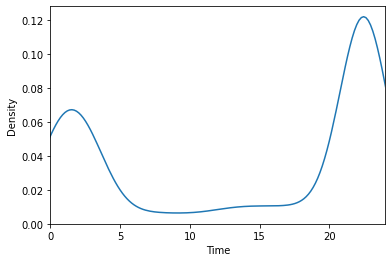

In [ ]:
sns.kdeplot(data_fraud["Time"])
plt.xlim(left = 0,right = 24)
plt.show()

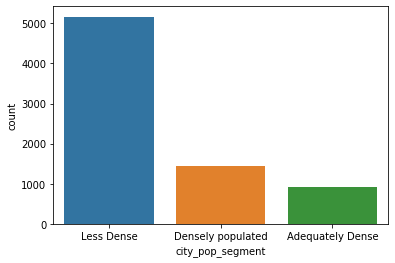

In [ ]:
sns.countplot(data_fraud["city_pop_segment"])
plt.show()

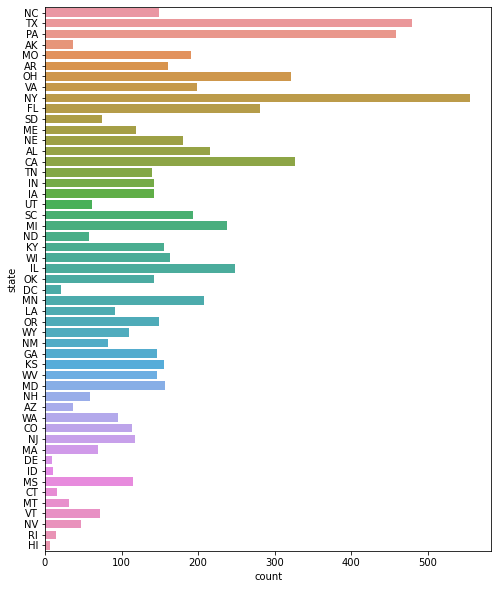

In [ ]:
plt.figure(figsize = [8,10])
sns.countplot(y=data_fraud.state)
plt.show()

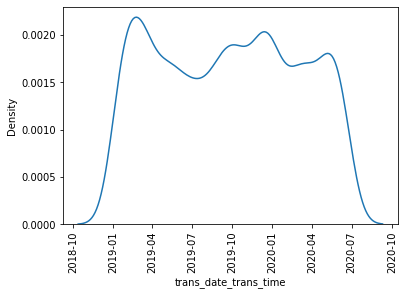

In [ ]:
sns.kdeplot(data_fraud.trans_date_trans_time)
plt.xticks(rotation = 90)
plt.show()

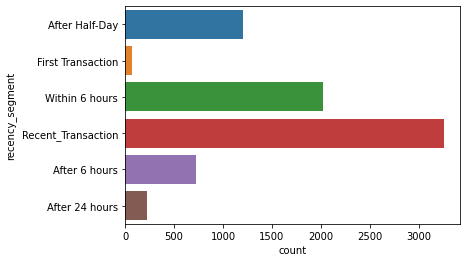

In [ ]:
sns.countplot(y=data_fraud.recency_segment)
plt.show()

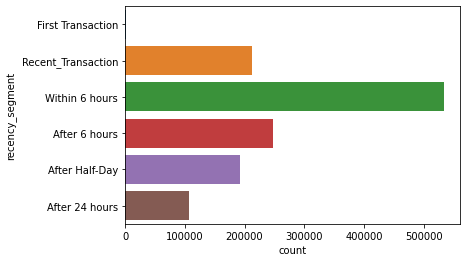

In [ ]:
sns.countplot(y=data.recency_segment)
plt.show()

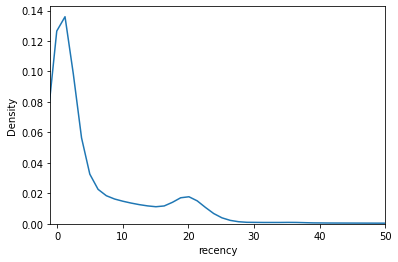

In [ ]:
sns.kdeplot(data_fraud.recency)
plt.xlim(right = 50,left = -1)
plt.show()

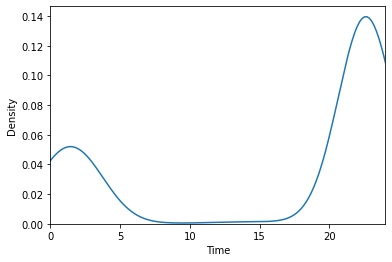

In [ ]:
sns.kdeplot(data_fraud[data_fraud["recency_segment"] == "Recent_Transaction"].Time)
plt.xlim(left=0,right=24)
plt.show()

In [ ]:
(data_fraud[data["recency_segment"] == "First Transaction"]["is_fraud"].sum()/len(data[data["recency"]<0]["is_fraud"]))*100

7.62970498474059

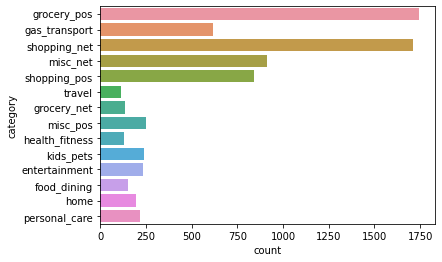

In [ ]:
sns.countplot(y=data_fraud.category)
plt.show()

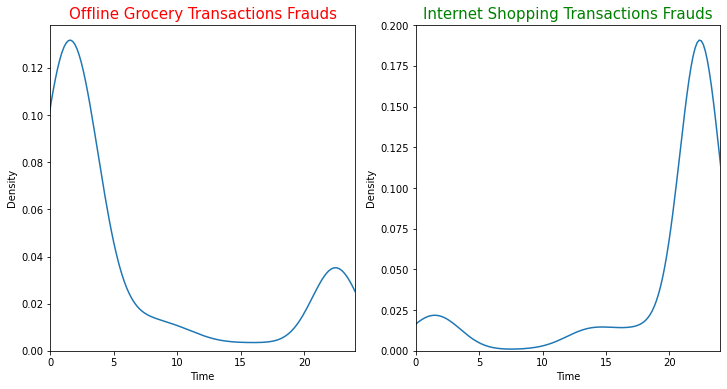

In [ ]:
plt.figure(figsize=[12,6])
plt.subplot(121)
sns.kdeplot(x=data_fraud[data_fraud.category == "grocery_pos"].Time)
plt.xlim(left=0,right=24)
plt.title(label = "Offline Grocery Transactions Frauds", fontdict = {"color": "Red", "size": 15, "weight" : "5"})
plt.subplot(122)
sns.kdeplot(x=data_fraud[data_fraud.category == "shopping_net"].Time)
plt.title(label = "Internet Shopping Transactions Frauds", fontdict = {"color": "Green", "size": 15, "weight" : "5"})
plt.xlim(left=0,right=24)
plt.show()

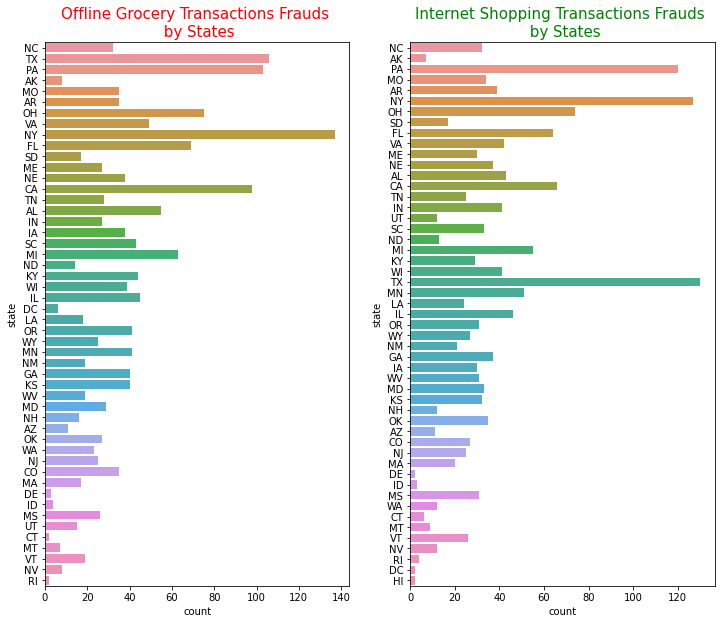

In [ ]:
plt.figure(figsize=[12,10])
plt.subplot(121)
sns.countplot(y=data_fraud[data_fraud.category == "grocery_pos"].state)
plt.title(label = "Offline Grocery Transactions Frauds \n by States", fontdict = {"color": "Red", "size": 15, "weight" : "5"})
plt.subplot(122)
sns.countplot(y=data_fraud[data_fraud.category == "shopping_net"].state)
plt.title(label = "Internet Shopping Transactions Frauds \n by States", fontdict = {"color": "Green", "size": 15, "weight" : "5"})
plt.show()

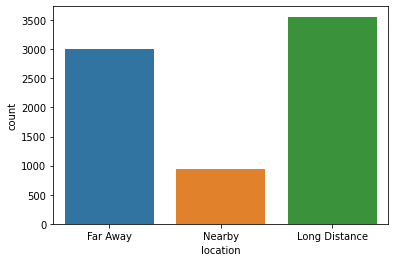

In [ ]:
sns.countplot(data_fraud.location)
plt.show()

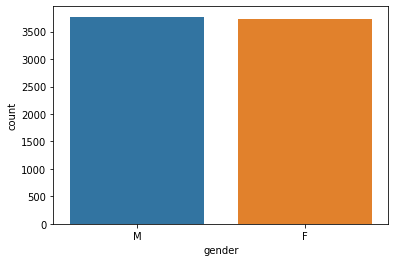

In [ ]:
sns.countplot(data_fraud.gender)
plt.show()

We can see that both are equally vulnerable to fraud transactions

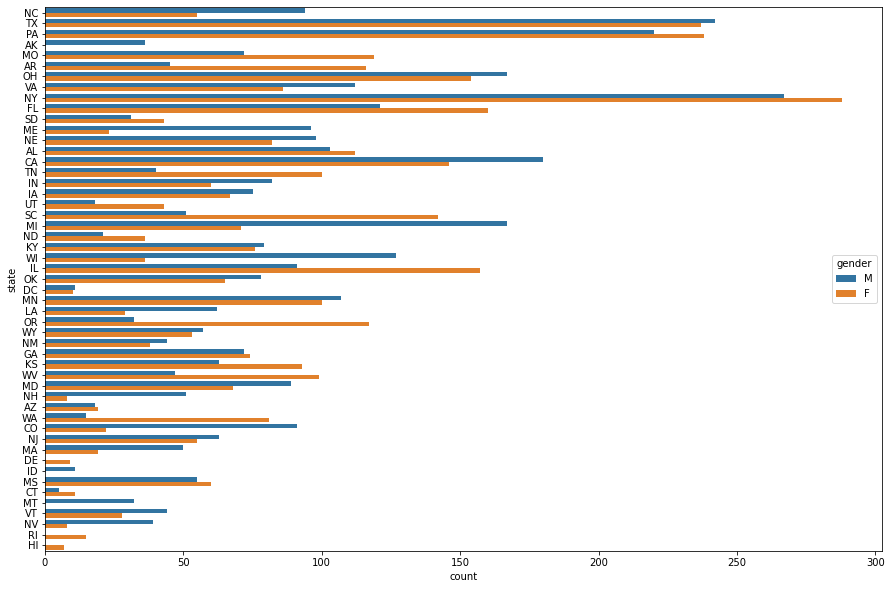

In [ ]:
plt.figure(figsize = [15,10])
sns.countplot(y=data_fraud.state, hue=data_fraud.gender)
plt.show()

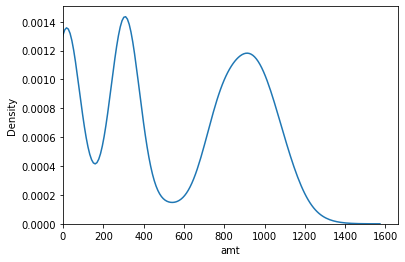

In [ ]:
sns.kdeplot(data_fraud.amt)
plt.xlim(left=0)
plt.show()

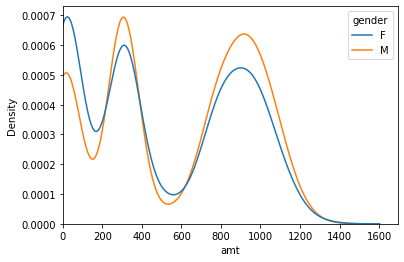

In [ ]:
sns.kdeplot(data_fraud.amt,hue=data.gender)
plt.xlim(left=0)
plt.show()

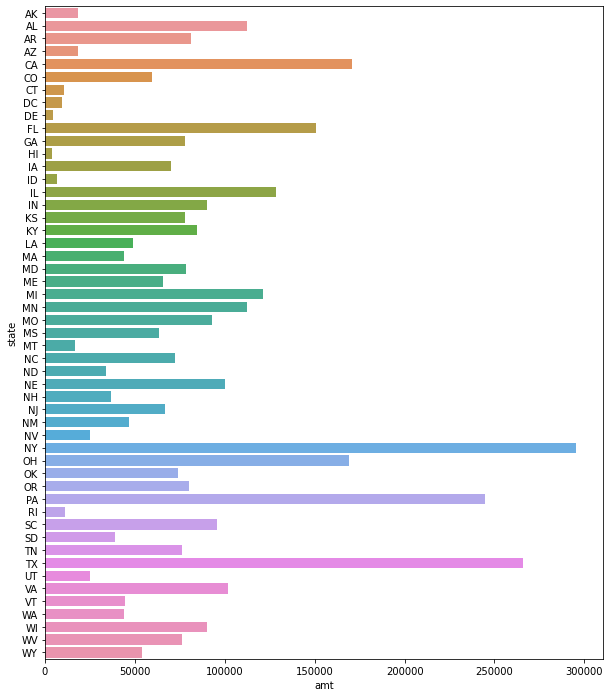

In [ ]:
data_state = data_fraud.groupby(by = "state").sum()
plt.figure(figsize=[10,12]),
sns.barplot(y = data_state.index,x=data_state.amt)
plt.show()

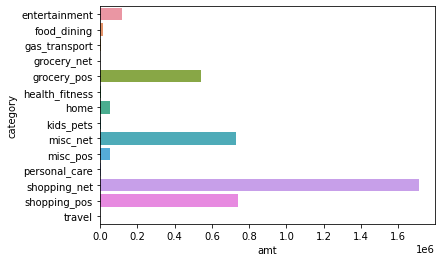

In [ ]:
data_cat = data_fraud.groupby(by = "category").sum()
sns.barplot(y = data_cat.index,x=data_cat.amt)
plt.show()

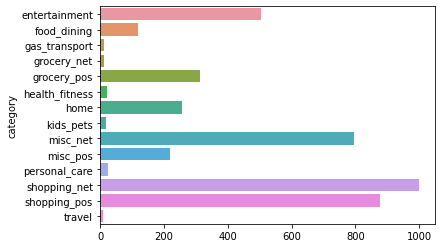

,Category,Ticket Size
11,shopping_net,999.254939
12,shopping_pos,876.921815
8,misc_net,797.012852
0,entertainment,503.535579
4,grocery_pos,311.989616
6,home,257.432626
9,misc_pos,218.284080
1,food_dining,120.076954
10,personal_care,26.170545
5,health_fitness,20.248421


In [ ]:
sns.barplot(y=data_cat.index,x= (data_cat.amt/data_cat.is_fraud))
plt.show()
data_ticket = pd.DataFrame({"Category" : data_cat.index,"Ticket Size": data_cat.amt/data_cat.is_fraud})
data_ticket.reset_index(inplace=True)
data_ticket.drop("category",1,inplace=True)
data_ticket.sort_values(by="Ticket Size",ascending=False)

In [ ]:
data4 = data.drop(columns=["trans_date_trans_time","cc_num","merchant","job","state"])
data5 = pd.get_dummies(data=data4,columns=["category","gender","recency_segment","city_pop_segment","location"], drop_first=True)


data6 = data_t.drop(columns=["trans_date_trans_time","cc_num","merchant","job","state"])
data_test = pd.get_dummies(data=data6,columns=["category","gender","recency_segment","city_pop_segment","location"], drop_first=True)

In [ ]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 28 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   amt                                 1296675 non-null  float64
 1   is_fraud                            1296675 non-null  int64  
 2   recency                             1296675 non-null  float64
 3   displacement                        1296675 non-null  float64
 4   Time                                1296675 non-null  int64  
 5   category_food_dining                1296675 non-null  uint8  
 6   category_gas_transport              1296675 non-null  uint8  
 7   category_grocery_net                1296675 non-null  uint8  
 8   category_grocery_pos                1296675 non-null  uint8  
 9   category_health_fitness             1296675 non-null  uint8  
 10  category_home                       1296675 non-null  uint8  
 11  category_ki

In [ ]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

In [ ]:
data5[["amt","Time","displacement","recency"]] = sc.fit_transform(data5[["amt","Time","displacement","recency"]])

In [ ]:
data5.head()

,amt,is_fraud,recency,displacement,Time,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,...,gender_M,recency_segment_After 6 hours,recency_segment_After Half-Day,recency_segment_First Transaction,recency_segment_Recent_Transaction,recency_segment_Within 6 hours,city_pop_segment_Densely populated,city_pop_segment_Less Dense,location_Long Distance,location_Nearby
0,-0.407826,0,-0.685836,0.376362,-1.878145,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1,0.230039,0,-0.685836,-1.732586,-1.878145,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
2,0.934149,0,-0.685836,0.738140,-1.878145,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
3,-0.158132,0,-0.685836,0.541322,-1.878145,0,1,0,0,0,...,1,0,0,1,0,0,0,1,1,0
4,-0.177094,0,-0.685836,0.361173,-1.878145,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0


In [ ]:
y= data5.is_fraud[:]
x=data5.drop("is_fraud",1)

In [ ]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 28 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   amt                                 1296675 non-null  float64
 1   is_fraud                            1296675 non-null  int64  
 2   recency                             1296675 non-null  float64
 3   displacement                        1296675 non-null  float64
 4   Time                                1296675 non-null  float64
 5   category_food_dining                1296675 non-null  uint8  
 6   category_gas_transport              1296675 non-null  uint8  
 7   category_grocery_net                1296675 non-null  uint8  
 8   category_grocery_pos                1296675 non-null  uint8  
 9   category_health_fitness             1296675 non-null  uint8  
 10  category_home                       1296675 non-null  uint8  
 11  category_ki

In [ ]:
import statsmodels.api as sm

model1 = sm.GLM(y,sm.add_constant(x),family = sm.families.Binomial())

In [ ]:
res = model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_fraud   No. Observations:              1296675
Model:                            GLM   Df Residuals:                  1296647
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35796.
Date:                Tue, 15 Mar 2022   Deviance:                       71592.
Time:                        12:09:49   Pearson chi2:                 2.32e+16
No. Iterations:                    12   Pseudo R-squ. (CS):            0.01585
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -7.7486      0.141    -54.827      0.000      -8.026      -7.472
amt                                    0.4236      0.005     77.804      0.000       0.413       0.434
recency                                0.0387      0.036      1.086      0.277      -0.031       0.109
displacement                          -0.0250      0.029     -0.862      0.389      -0.082       0.032
Time                                   0.7163      0.016     43.508      0.000       0.684       0.749
category_food_dining                  -0.3879      0.105     -3.706      0.000      -0.593      -0.183
category_gas_transport                 1.9510      0.082     23.846      0.000       1.791       2.111
category_grocery_net                   1.5267      0.112     13.613      0.000       1.307       1.746
category_grocery_pos                   2.8371      0.074     38.111      0.000       2.691       2.983
category_health_fitness               -0.5328      0.109     -4.893      0.000      -0.746      -0.319
category_home                         -0.4951      0.097     -5.110      0.000      -0.685      -0.305
category_kids_pets                    -0.2073      0.092     -2.245      0.025      -0.388      -0.026
category_misc_net                      2.2242      0.076     29.337      0.000       2.076       2.373
category_misc_pos                      0.4956      0.092      5.367      0.000       0.315       0.677
category_personal_care                -0.0344      0.094     -0.365      0.715      -0.219       0.150
category_shopping_net                  1.6448      0.072     22.735      0.000       1.503       1.787
category_shopping_pos                  0.6863      0.078      8.803      0.000       0.533       0.839
category_travel                       -6.2249      0.327    -19.064      0.000      -6.865      -5.585
gender_M                               0.3241      0.025     13.112      0.000       0.276       0.373
recency_segment_After 6 hours          0.3901      0.125      3.120      0.002       0.145       0.635
recency_segment_After Half-Day         1.1960      0.106     11.292      0.000       0.988       1.404
recency_segment_First Transaction      3.7935      0.189     20.025      0.000       3.422       4.165
recency_segment_Recent_Transaction     2.0405      0.138     14.738      0.000       1.769       2.312
recency_segment_Within 6 hours         0.6942      0.133      5.214      0.000       0.433       0.955
city_pop_segment_Densely populated    -0.0570      0.045     -1.260      0.208      -0.146       0.032
city_pop_segment_Less Dense            0.0464      0.038      1.208      0.227      -0.029       0.122
location_Long Distance                 0.0226      0.046      0.490      0.624      -0.068      

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
rfe = RFE(estimator = logreg, n_features_to_select= 22)
rfe_res = rfe.fit(x,y)

In [ ]:
x.columns[rfe_res.support_]

Index(['amt', 'Time', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M',
       'recency_segment_After 6 hours', 'recency_segment_After Half-Day',
       'recency_segment_First Transaction',
       'recency_segment_Recent_Transaction', 'recency_segment_Within 6 hours',
       'city_pop_segment_Densely populated', 'location_Nearby'],
      dtype='object')

In [ ]:
list(zip(x.columns,rfe.support_,rfe.ranking_))

[('amt', True, 1),
 ('recency', False, 6),
 ('displacement', False, 4),
 ('Time', True, 1),
 ('category_food_dining', True, 1),
 ('category_gas_transport', True, 1),
 ('category_grocery_net', True, 1),
 ('category_grocery_pos', True, 1),
 ('category_health_fitness', True, 1),
 ('category_home', True, 1),
 ('category_kids_pets', True, 1),
 ('category_misc_net', True, 1),
 ('category_misc_pos', True, 1),
 ('category_personal_care', False, 2),
 ('category_shopping_net', True, 1),
 ('category_shopping_pos', True, 1),
 ('category_travel', True, 1),
 ('gender_M', True, 1),
 ('recency_segment_After 6 hours', True, 1),
 ('recency_segment_After Half-Day', True, 1),
 ('recency_segment_First Transaction', True, 1),
 ('recency_segment_Recent_Transaction', True, 1),
 ('recency_segment_Within 6 hours', True, 1),
 ('city_pop_segment_Densely populated', True, 1),
 ('city_pop_segment_Less Dense', False, 3),
 ('location_Long Distance', False, 5),
 ('location_Nearby', True, 1)]

In [ ]:
cols = x.columns[rfe_res.support_]

In [ ]:
model2 = sm.GLM(y,sm.add_constant(x[cols]),family = sm.families.Binomial())
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_fraud   No. Observations:              1296675
Model:                            GLM   Df Residuals:                  1296652
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35798.
Date:                Tue, 15 Mar 2022   Deviance:                       71596.
Time:                        12:11:56   Pearson chi2:                 2.32e+16
No. Iterations:                    12   Pseudo R-squ. (CS):            0.01585
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -7.6190      0.087    -87.823      0.000      -7.789      -7.449
amt                                    0.4236      0.005     77.828      0.000       0.413       0.434
Time                                   0.7157      0.016     43.481      0.000       0.683       0.748
category_food_dining                  -0.3713      0.094     -3.944      0.000      -0.556      -0.187
category_gas_transport                 1.9677      0.068     28.907      0.000       1.834       2.101
category_grocery_net                   1.5397      0.103     15.022      0.000       1.339       1.741
category_grocery_pos                   2.8527      0.059     48.363      0.000       2.737       2.968
category_health_fitness               -0.5157      0.099     -5.220      0.000      -0.709      -0.322
category_home                         -0.4782      0.085     -5.602      0.000      -0.646      -0.311
category_kids_pets                    -0.1906      0.080     -2.378      0.017      -0.348      -0.034
category_misc_net                      2.2407      0.061     36.968      0.000       2.122       2.360
category_misc_pos                      0.5114      0.080      6.371      0.000       0.354       0.669
category_shopping_net                  1.6594      0.056     29.586      0.000       1.549       1.769
category_shopping_pos                  0.7005      0.063     11.088      0.000       0.577       0.824
category_travel                       -6.2082      0.323    -19.192      0.000      -6.842      -5.574
gender_M                               0.3235      0.025     13.099      0.000       0.275       0.372
recency_segment_After 6 hours          0.2891      0.081      3.550      0.000       0.129       0.449
recency_segment_After Half-Day         1.1196      0.077     14.450      0.000       0.968       1.271
recency_segment_First Transaction      3.6655      0.148     24.753      0.000       3.375       3.956
recency_segment_Recent_Transaction     1.9156      0.074     25.838      0.000       1.770       2.061
recency_segment_Within 6 hours         0.5769      0.075      7.672      0.000       0.429       0.724
city_pop_segment_Densely populated    -0.0959      0.032     -3.041      0.002      -0.158      -0.034
location_Nearby                       -0.0616      0.037     -1.659      0.097      -0.134       0.011
======================================================================================================
"""

In [ ]:
cols = cols.drop(["recency_segment_After 6 hours","location_Nearby"],1)

In [ ]:
model3 = sm.GLM(y,sm.add_constant(x[cols]),family = sm.families.Binomial())
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_fraud   No. Observations:              1296675
Model:                            GLM   Df Residuals:                  1296654
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35806.
Date:                Tue, 15 Mar 2022   Deviance:                       71611.
Time:                        12:12:13   Pearson chi2:                 2.32e+16
No. Iterations:                    12   Pseudo R-squ. (CS):            0.01583
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -7.4127      0.060   -123.399      0.000      -7.530      -7.295
amt                                    0.4235      0.005     77.830      0.000       0.413       0.434
Time                                   0.7160      0.016     43.516      0.000       0.684       0.748
category_food_dining                  -0.3716      0.094     -3.947      0.000      -0.556      -0.187
category_gas_transport                 1.9706      0.068     28.953      0.000       1.837       2.104
category_grocery_net                   1.5447      0.102     15.072      0.000       1.344       1.746
category_grocery_pos                   2.8551      0.059     48.414      0.000       2.739       2.971
category_health_fitness               -0.5158      0.099     -5.221      0.000      -0.709      -0.322
category_home                         -0.4781      0.085     -5.602      0.000      -0.645      -0.311
category_kids_pets                    -0.1906      0.080     -2.378      0.017      -0.348      -0.034
category_misc_net                      2.2421      0.061     36.994      0.000       2.123       2.361
category_misc_pos                      0.5121      0.080      6.380      0.000       0.355       0.669
category_shopping_net                  1.6605      0.056     29.607      0.000       1.551       1.770
category_shopping_pos                  0.7006      0.063     11.090      0.000       0.577       0.824
category_travel                       -6.2040      0.323    -19.186      0.000      -6.838      -5.570
gender_M                               0.3220      0.025     13.043      0.000       0.274       0.370
recency_segment_After Half-Day         0.9048      0.046     19.799      0.000       0.815       0.994
recency_segment_First Transaction      3.4496      0.134     25.708      0.000       3.187       3.713
recency_segment_Recent_Transaction     1.7009      0.040     42.723      0.000       1.623       1.779
recency_segment_Within 6 hours         0.3620      0.042      8.683      0.000       0.280       0.444
city_pop_segment_Densely populated    -0.0959      0.032     -3.041      0.002      -0.158      -0.034
======================================================================================================
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame({"Features":cols})
vif["VIF"] = [variance_inflation_factor(x[cols].values,i) for i in range(x[cols].shape[1])]
vif = vif.sort_values(by="VIF",ascending = False)

In [ ]:
vif

,Features,VIF
18,recency_segment_Within 6 hours,2.016160
1,Time,1.886867
14,gender_M,1.686097
3,category_gas_transport,1.523325
5,category_grocery_pos,1.503281
17,recency_segment_Recent_Transaction,1.412568
15,recency_segment_After Half-Day,1.360641
7,category_home,1.283113
8,category_kids_pets,1.253831
12,category_shopping_pos,1.237905


In [ ]:
pred = res3.predict(sm.add_constant(x[cols]))

In [ ]:
predictions = pd.DataFrame({"Actual": y,"Pred_Prob" : pred})

In [ ]:
predictions.head()

,Actual,Pred_Prob
0,0,0.037746
1,0,0.086650
2,0,0.010050
3,0,0.043852
4,0,0.010471


In [ ]:
threshold = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for z in threshold:
  predictions[z] = predictions["Pred_Prob"].map(lambda x: 0 if x<z else 1)

In [ ]:
predictions.head()

,Actual,Pred_Prob,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.037746,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.086650,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.010050,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.043852,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.010471,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import sklearn.metrics as metrics

In [ ]:
curve = pd.DataFrame(index = threshold, columns = ["accuracy","sensitivity","specificity"])

In [ ]:
for y in threshold:
  matrix = metrics.confusion_matrix(predictions.Actual,predictions[y])
  accuracy = (matrix[1,1] + matrix[0,0])/ (matrix.sum())
  sensitivity = (matrix[1,1])/(matrix[1,1] + matrix[1,0])
  specificity = (matrix[0,0])/(matrix[0,0] + matrix[0,1])

  curve.loc[y] = [accuracy,sensitivity,specificity]

In [ ]:
curve

,accuracy,sensitivity,specificity
0.01,0.89432,0.669864,0.895627
0.02,0.961172,0.549427,0.96357
0.03,0.978435,0.511058,0.981156
0.04,0.985558,0.463363,0.988598
0.05,0.989496,0.427391,0.992769
0.06,0.991814,0.404077,0.995236
0.07,0.992953,0.388223,0.996474
0.08,0.993528,0.373435,0.997138
0.09,0.993869,0.361844,0.997549
0.10,0.994107,0.347056,0.997875


<AxesSubplot:>

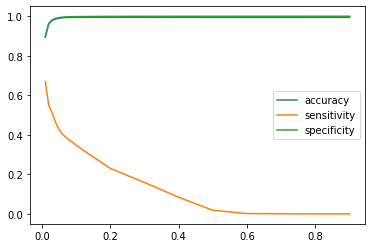

In [ ]:
curve.plot()

In [ ]:
for y in threshold:
  curve.loc[y,"Precision"] = metrics.precision_score(predictions.Actual,predictions[y])
  curve.loc[y,"Recall"] = metrics.recall_score(predictions.Actual,predictions[y])

<AxesSubplot:>

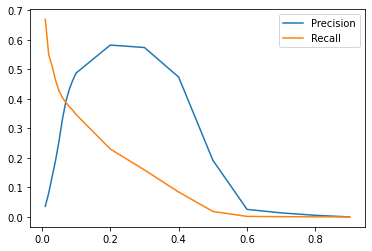

In [ ]:
curve[["Precision","Recall"]].plot()

In [ ]:
curve

,accuracy,sensitivity,specificity,Precision,Recall
0.01,0.89432,0.669864,0.895627,0.036022,0.669864
0.02,0.961172,0.549427,0.96357,0.080722,0.549427
0.03,0.978435,0.511058,0.981156,0.136372,0.511058
0.04,0.985558,0.463363,0.988598,0.191341,0.463363
0.05,0.989496,0.427391,0.992769,0.256026,0.427391
0.06,0.991814,0.404077,0.995236,0.330608,0.404077
0.07,0.992953,0.388223,0.996474,0.390617,0.388223
0.08,0.993528,0.373435,0.997138,0.431762,0.373435
0.09,0.993869,0.361844,0.997549,0.462219,0.361844
0.10,0.994107,0.347056,0.997875,0.487371,0.347056


In [ ]:
predictions.head()

,Actual,Pred_Prob,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.037746,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.086650,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.010050,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.043852,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.010471,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
profit = pd.merge(data["amt"],predictions,left_index = True,right_index=True)

In [ ]:
profit.head()

,amt,Actual,Pred_Prob,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,4.97,0,0.037746,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.23,0,0.086650,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,220.11,0,0.010050,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45.00,0,0.043852,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41.96,0,0.010471,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
profit_table = pd.DataFrame(index=threshold,columns = ["Fraud_Loss","Predicted_Loss","Cost","Profit_Of_Company"])

In [ ]:
for z in threshold:
  loss = data[data["is_fraud"]==1]["amt"].sum()
  Predicted_Loss1 = profit[(profit[z]==1) & (profit["Actual"]==1)]["amt"].sum()
  cost = profit[z].sum()*1.5
  Profit = Predicted_Loss1 - cost

  profit_table.loc[z] = [loss,Predicted_Loss1,cost,Profit]

In [ ]:
profit_table

,Fraud_Loss,Predicted_Loss,Cost,Profit_Of_Company
0.01,3988088.61,3615402.66,209374.5,3406028.16
0.02,3988088.61,3228350.09,76633.5,3151716.59
0.03,3988088.61,3069474.47,42193.5,3027280.97
0.04,3988088.61,2889810.11,27265.5,2862544.61
0.05,3988088.61,2741228.19,18795.0,2722433.19
0.06,3988088.61,2613663.13,13761.0,2599902.13
0.07,3988088.61,2517836.13,11190.0,2506646.13
0.08,3988088.61,2428671.55,9738.0,2418933.55
0.09,3988088.61,2354888.32,8814.0,2346074.32
0.10,3988088.61,2265519.67,8017.5,2257502.17


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


def edu_roc( real, probability ):


    fpr, tpr, thresholds = roc_curve( real, probability,drop_intermediate = False )

    auc_score = roc_auc_score( real, probability )

    plt.figure(figsize=(8, 4))


    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )

    plt.plot([0, 1], [0, 1], 'r--')

    plt.xlim([0.0, 1.0])

    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')

    plt.ylabel('True Positive Rate')

    plt.title('ROC Curve')

    plt.legend(loc="best")

    plt.show()

    return None

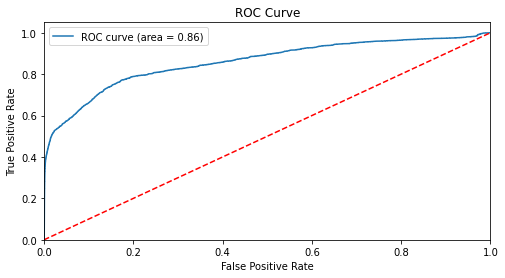

In [ ]:
edu_roc(predictions["Actual"],predictions["Pred_Prob"])

In [ ]:
target_test = data_test["is_fraud"]
x_test = data_test.drop("is_fraud",1)

In [ ]:
x_test[["amt","Time","displacement","recency"]] = sc.fit_transform(x_test[["amt","Time","displacement","recency"]])

In [ ]:
result = res3.predict(sm.add_constant(x_test[cols]))

In [ ]:
predictions_test = pd.DataFrame({"Actual": target_test,"Pred_Prob" : result})

In [ ]:
predictions_test["Final"] = predictions_test["Pred_Prob"].map(lambda x: 0 if x<0.01 else 1)

In [ ]:
metrics.precision_score(predictions_test["Actual"],predictions_test["Final"])

0.02260855884203902

In [ ]:
metrics.recall_score(predictions_test["Actual"],predictions_test["Final"])

0.66993006993007

In [ ]:
print(metrics.classification_report(predictions_test["Actual"],predictions_test["Final"]))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94    553574
           1       0.02      0.67      0.04      2145

    accuracy                           0.89    555719
   macro avg       0.51      0.78      0.49    555719
weighted avg       0.99      0.89      0.94    555719



In [ ]:
profit = pd.merge(data_t["amt"],predictions_test,left_index = True,right_index = True)

In [ ]:
loss = data_t[data_t["is_fraud"]==1]["amt"].sum()
Predicted_Loss = profit[(profit["Final"]==1) & (profit["Actual"]==1)]["amt"].sum()
cost = profit["Final"].sum()*1.5
Profit = Predicted_Loss - cost

profit_table = pd.DataFrame({"Fraud_Loss" : [loss],"Predicted_Loss" : [Predicted_Loss],"Cost" : [cost],"Profit_Of_Company" : [Profit]})

In [ ]:
profit_table

,Fraud_Loss,Predicted_Loss,Cost,Profit_Of_Company
0,1133324.68,1033660.98,95340.0,938320.98


In [ ]:
data_t.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'state', 'job', 'is_fraud', 'recency', 'displacement',
       'location', 'Time', 'city_pop_segment', 'recency_segment'],
      dtype='object')

In [ ]:
data_t["month"] = data_t["trans_date_trans_time"].dt.month

In [ ]:
data_t["year"] = data_t["trans_date_trans_time"].dt.year

In [ ]:
result1 = (data_t.groupby(by = ["year","month"]).count()).mean()

In [ ]:
result1[1]

79388.42857142857

In [ ]:
result2 = (data_t[data_t["is_fraud"]==1].groupby(by = ["year","month"]).count()).mean()

In [ ]:
result2[1]

306.42857142857144

Average amount per fraud transaction

In [ ]:
result3 = data_t[data_t["is_fraud"]==1]["amt"].sum()/data_t[data_t["is_fraud"]==1].count()

In [ ]:
result3[1]

528.3564941724942

In [ ]:
result2[1] * result3[1]

161903.52571428573

In [ ]:
predictions_test.head()

,Actual,Pred_Prob,Final
0,0,0.017955,1
1,0,0.015444,1
2,0,0.009566,0
3,0,0.034386,1
4,0,0.000041,0


In [ ]:
predictions_test = pd.merge(data_t[["trans_date_trans_time","month","year"]],predictions_test,right_index=True,left_index= True)

In [ ]:
predictions_test.head()

,trans_date_trans_time,month,year,Actual,Pred_Prob,Final
0,2020-06-21 12:14:25,6,2020,0,0.017955,1
1,2020-06-21 12:14:33,6,2020,0,0.015444,1
2,2020-06-21 12:14:53,6,2020,0,0.009566,0
3,2020-06-21 12:15:15,6,2020,0,0.034386,1
4,2020-06-21 12:15:17,6,2020,0,0.000041,0


In [ ]:
TF = (predictions_test[(predictions_test["Final"]==1)].groupby(by=["year","month"]).count()).mean()[1]

In [ ]:
TF

9080.0

In [ ]:
TF*1.5

13620.0

In [ ]:
FN = (predictions_test[(predictions_test["Final"]==0) & (predictions_test["Actual"] == 1)].groupby(by=["year","month"]).count()).mean()[1]

In [ ]:
FN

101.14285714285714

In [ ]:
predictions_test = pd.merge(data_t[["amt"]],predictions_test,right_index=True,left_index= True)

In [ ]:
predictions_test.head()

,amt,trans_date_trans_time,month,year,Actual,Pred_Prob,Final
0,2.86,2020-06-21 12:14:25,6,2020,0,0.017955,1
1,29.84,2020-06-21 12:14:33,6,2020,0,0.015444,1
2,41.28,2020-06-21 12:14:53,6,2020,0,0.009566,0
3,60.05,2020-06-21 12:15:15,6,2020,0,0.034386,1
4,3.19,2020-06-21 12:15:17,6,2020,0,0.000041,0


In [ ]:
result5 = predictions_test[(predictions_test["Final"]==0) & (predictions_test["Actual"] == 1)]["amt"].sum()

In [ ]:
result5

99663.70000000001

In [ ]:
per_month_fraud_amt = (predictions_test[(predictions_test["Final"]==0) & (predictions_test["Actual"] == 1)].groupby(by = ["year","month"]).sum()["amt"]).mean()

In [ ]:
per_month_fraud_amt

14237.67142857143

In [ ]:
cost_per_month = TF*1.5

In [ ]:
total_cost_per_month = per_month_fraud_amt + cost_per_month

In [ ]:
total_cost_per_month

27857.67142857143

In [ ]:
(result2[1]*result3[1]) - total_cost_per_month

134045.8542857143